In [27]:
import tensorflow as tf
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

We begin by loading in our data. We then plot some example points.

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_test.shape

(10000, 28, 28)

2


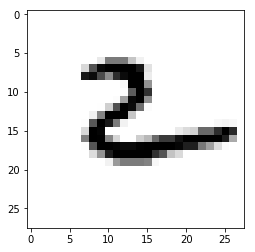

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index=109
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

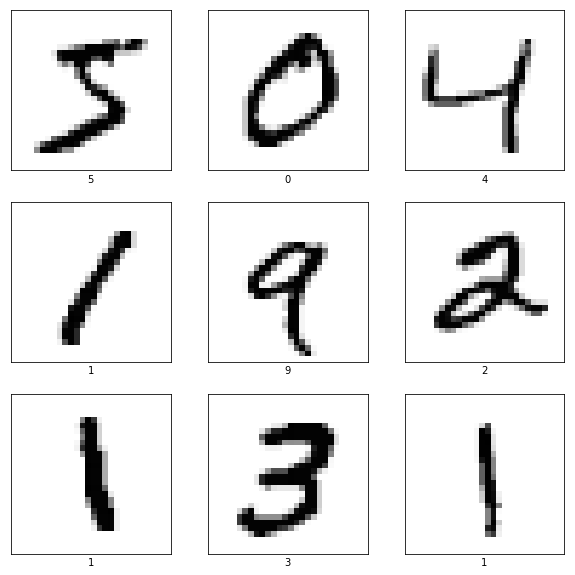

In [31]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='Greys')
    plt.xlabel(y_train[i])
plt.show()

What's actually in each of these x_train data points? Pixels! Pixels range in value from 0 to 255, where 0 represents white and 255 represents black. 

![remote sensing](images.png)

In [64]:
print(x_train[image_index][15][15])

252


We squash these values down to the range [0, 1] by dividing by 255.

In [3]:
x_train, x_test=x_train/255, x_test/255

We are now ready to build our model! To do this, we'll build it in three steps, with only one hidden layer.

In [38]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(42, activation=tf.nn.relu),
    keras.layers.Dense(15, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

![neural network](goal.png)

Essentially, our model is performing the computation $\bar{h}=\sigma(W^t \bar{x}+\bar{b})$ in the first layer, where $W$ is a $784\times 15$ weight matrix, and $\bar{b}$ is a $15\times 1$ bias vector. This accounts for a $11760+15=11775$ parameters. In the second layer, we have $\bar{o}=\text{softmax}(\tilde{W} \bar{h}+\tilde{b})$, where $\tilde{W}$ is a $10\times 15$ weight matrix, and $\tilde{b}$ is a $10\times 1$ bias vector. This accounts for $150+10=160$ parameters. We can summarize this below.

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 42)                32970     
_________________________________________________________________
dense_17 (Dense)             (None, 15)                645       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                160       
Total params: 33,775
Trainable params: 33,775
Non-trainable params: 0
_________________________________________________________________


We perform one hot encoding to compare our model's results to the expected one:

In [33]:
y_test=keras.utils.to_categorical(y_test, num_classes=10)
y_train=keras.utils.to_categorical(y_train, num_classes=10)

We're now ready to compile the model! To do this, we need three parameters (taken from [TensorFlow Tutorials](https://www.tensorflow.org/tutorials/keras/basic_classification)):
* Loss function: This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* Optimizer: This is how the model is updated based on the data it sees and its loss function.
* Metrics: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [40]:
model.compile(loss=tf.losses.log_loss,
              optimizer=tf.train.GradientDescentOptimizer(0.2),
              metrics=['accuracy'])

Let's breakdown what these mean one step at a time. 

In [41]:
model.fit(x_train, y_train, epochs=42, batch_size=300)

Epoch 1/42
60000/60000 [==============================] - 1s 24us/step - loss: 0.2397 - acc: 0.5749
Epoch 2/42
60000/60000 [==============================] - 1s 12us/step - loss: 0.1402 - acc: 0.8517
Epoch 3/42
60000/60000 [==============================] - 1s 13us/step - loss: 0.0882 - acc: 0.8908
Epoch 4/42
60000/60000 [==============================] - 1s 13us/step - loss: 0.0672 - acc: 0.9076
Epoch 5/42
60000/60000 [==============================] - 1s 12us/step - loss: 0.0571 - acc: 0.9179
Epoch 6/42
60000/60000 [==============================] - 1s 13us/step - loss: 0.0499 - acc: 0.9262
Epoch 7/42
60000/60000 [==============================] - 1s 12us/step - loss: 0.0461 - acc: 0.9292
Epoch 8/42
60000/60000 [==============================] - 1s 12us/step - loss: 0.0443 - acc: 0.9314
Epoch 9/42
60000/60000 [==============================] - 1s 15us/step - loss: 0.0416 - acc: 0.9351
Epoch 10/42
60000/60000 [==============================] - 1s 16us/step - loss: 0.0392 - acc: 0.9378

In [42]:
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print('Test Accuracy', test_accuracy)

10000/10000 [==============================] - 0s 41us/step
Test Accuracy 0.9515


In [43]:
predictions=model.predict(x_test)

In [44]:
predictions[0]

array([4.1903887e-04, 4.6286135e-05, 1.3694421e-03, 1.8491673e-04,
       2.5035249e-04, 2.0312375e-05, 2.3137871e-05, 9.9619353e-01,
       1.7122124e-04, 1.3217767e-03], dtype=float32)

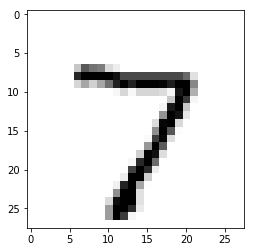

In [45]:
plt.imshow(x_test[0], cmap='Greys')

In [46]:
import numpy as np

In [47]:
np.argmax(predictions[0])

7

In [99]:
def right_or_wrong(i, predictions, true_labels):
    '''Returns whether a prediction is right or wrong'''
    prediction=np.argmax(predictions[i])
    true_label=np.argmax(true_labels[i])
    return true_label==prediction

In [96]:
def plot_image(i, predictions, true_labels, img):
    prediction, true_label, img=predictions[i], true_labels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap='Greys')
    
    predicted_label=np.argmax(prediction)
    true_label=np.argmax(true_label)
    
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label, 100*np.max(prediction), true_label, color=color))
        

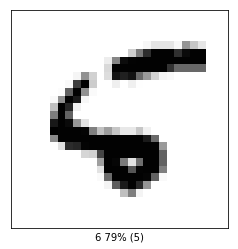

In [100]:
for i in range(100):
    if not right_or_wrong(i, predictions, y_test):
        plot_image(i, predictions, y_test, x_test)
        break
        

In [105]:
img=x_test[0]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
print(predictions_single)

[[4.1903887e-04 4.6286135e-05 1.3694421e-03 1.8491673e-04 2.5035249e-04
  2.0312375e-05 2.3137871e-05 9.9619353e-01 1.7122124e-04 1.3217767e-03]]
